In [ ]:

import numpy as np
import pandas as pd
import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = "/content/drive/MyDrive/DataSet/train/"
test_dir = "/content/drive/MyDrive/DataSet/test/"

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

train_dir = "/content/drive/MyDrive/DataSet/train/"
output_dir = "/content/drive/MyDrive/DataSet/data/"

# Split the data into training and validation sets
splitfolders.ratio(train_dir, output=output_dir, seed=1337, ratio=(0.9, 0.10))

Copying files: 294 files [00:02, 118.00 files/s]


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)



In [ ]:

batch_size = 30

In [ ]:
train_generator = train_datagen.flow_from_directory(
    os.path.join(output_dir, 'train'),
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    os.path.join(output_dir, 'val'),
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='binary'
)


Found 264 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
input_shape = (100,100,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [ ]:
from keras import optimizers

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),  # Use learning_rate instead of lr
    metrics=['acc']
)

steps_per_epoch = 264 // batch_size
validation_steps = 30 // batch_size
print(steps_per_epoch, validation_steps)

8 1


In [ ]:
history = model.fit(train_generator ,steps_per_epoch = steps_per_epoch ,
                    epochs=60, validation_data= validation_generator,validation_steps=validation_steps )



Epoch 1/60
8/8 [==============================] - 1s 118ms/step - loss: 0.6777 - acc: 0.5958 - val_loss: 0.6561 - val_acc: 0.5667
Epoch 2/60
8/8 [==============================] - 1s 94ms/step - loss: 0.6611 - acc: 0.6154 - val_loss: 0.6528 - val_acc: 0.7333
Epoch 3/60
8/8 [==============================] - 1s 88ms/step - loss: 0.6525 - acc: 0.6538 - val_loss: 0.6246 - val_acc: 0.6000
Epoch 4/60
8/8 [==============================] - 1s 89ms/step - loss: 0.6241 - acc: 0.7009 - val_loss: 0.6366 - val_acc: 0.6000
Epoch 5/60
8/8 [==============================] - 1s 78ms/step - loss: 0.6211 - acc: 0.6538 - val_loss: 0.5915 - val_acc: 0.6333
Epoch 6/60
8/8 [==============================] - 1s 87ms/step - loss: 0.6025 - acc: 0.7009 - val_loss: 0.5554 - val_acc: 0.7667
Epoch 7/60
8/8 [==============================] - 1s 88ms/step - loss: 0.6114 - acc: 0.6667 - val_loss: 0.5756 - val_acc: 0.7333
Epoch 8/60
8/8 [==============================] - 1s 90ms/step - loss: 0.6077 - acc: 0.7009 - va

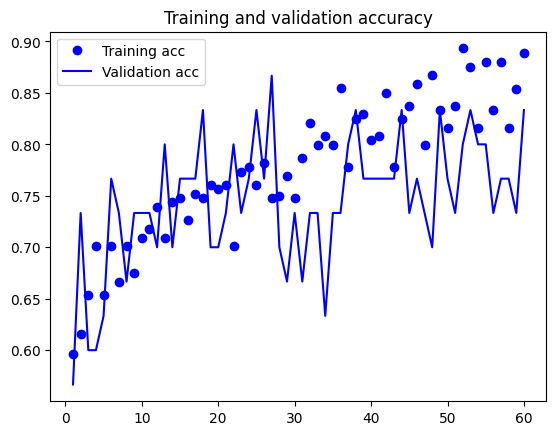

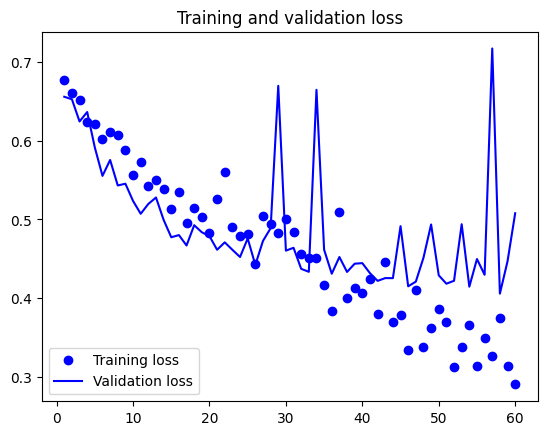

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode='binary'
)

Found 97 images belonging to 2 classes.


In [ ]:
test_steps = len(test_generator)
print(test_steps)

4


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_steps)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


4/4 [==============================] - 19s 6s/step - loss: 0.4835 - acc: 0.7835
Test Loss: 0.4834985136985779
Test Accuracy: 0.7835051417350769


4/4 [==============================] - 0s 41ms/step


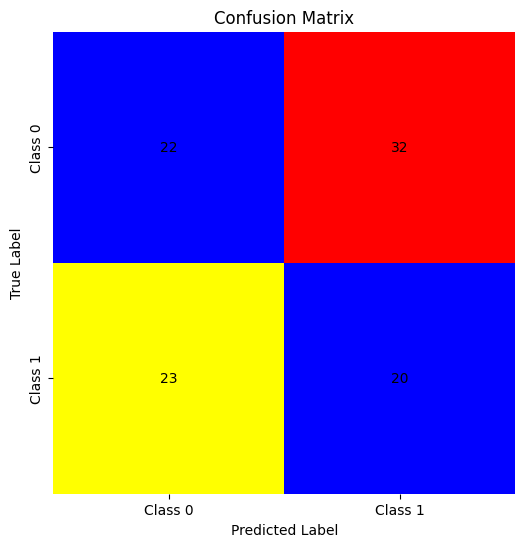

Original Predicted Probabilities:
[0.5530835  0.97346276 0.85743487 0.91186756 0.09006566 0.3399972
 0.77415043 0.05139321 0.21763086 0.98865753 0.9952911  0.70288765
 0.09672346 0.90820014 0.8099747  0.09277906 0.08954481 0.28185764
 0.92220247 0.9708137  0.60612655 0.5877706  0.7789437  0.1944818
 0.97457707 0.24497373 0.5500251  0.3545043  0.6886923  0.14351179
 0.22027285 0.8422841  0.99147695 0.46596482 0.14960746 0.9758346
 0.9443289  0.9537479  0.64951473 0.27731058 0.9564648  0.99643683
 0.90397286 0.22057778 0.39736447 0.9256597  0.18917538 0.97537076
 0.9867589  0.9677665  0.41209722 0.51589507 0.42975748 0.04156835
 0.8531703  0.11577625 0.10191795 0.59991354 0.18921255 0.8248043
 0.04679452 0.7357961  0.9845367  0.25859275 0.2409193  0.98320836
 0.9045005  0.27572045 0.06414423 0.45369774 0.14970374 0.8745112
 0.4119286  0.32899806 0.96540767 0.45229486 0.32313213 0.48288524
 0.6664581  0.87114763 0.21614066 0.7473531  0.33419797 0.45107338
 0.4362591  0.16158508 0.959676  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have the test_generator and test_steps defined from the previous code

# Get the model's predictions for the test data
y_pred_prob = model.predict(test_generator, steps=test_steps)

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred = np.round(y_pred_prob).flatten()

# Get true labels from the test generator
y_true = test_generator.classes

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define colors for the heatmap
cmap = sns.color_palette(["blue", "yellow", "orange", "red"])  # Color map for the heatmap

# Display the confusion matrix as a heatmap with colored cells
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap=cmap, fmt="d",
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"],
            annot_kws={"color": "black"}, cbar=False, square=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print the original predicted probabilities and the true labels side by side
print("Original Predicted Probabilities:")
print(y_pred_prob.flatten())
print("True labels:")
print(y_true)
